In [ ]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt  #for visuvalisation
import pandas as pd
import seaborn as sns
import os #for folder

Now we need to first mount drive where folders are kept


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Training Folder
and Content inside it


In [ ]:
training_folder = "/content/drive/MyDrive/ML_project/Train"

number_of_images = {}

for dir in os.listdir(training_folder):
  number_of_images[dir] = len(os.listdir(os.path.join(training_folder, dir)))

In [ ]:
  number_of_images.items()

dict_items([('NON _CANCER', 450), ('CANCER', 489)])

In [ ]:
len(os.listdir("/content/drive/MyDrive/ML_project/Train"))

2

Test folder


In [ ]:
testing_folder = "/content/drive/MyDrive/ML_project/Test"

number_of_imagest = {}

for dir in os.listdir(testing_folder):
  number_of_imagest[dir] = len(os.listdir(os.path.join(testing_folder, dir)))

In [ ]:
  number_of_imagest.items()

dict_items([('NON_CANCER', 250), ('CANCER', 500)])

MODEL

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator


def preprocessingImages1(path):
    """
    input : Path
    output: Pre Processed images
    """
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function=preprocess_input, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image


In [ ]:
path = "/content/drive/MyDrive/ML_project/Train"
train_data = preprocessingImages1(path)

Found 939 images belonging to 2 classes.


In [ ]:
from PIL import Image
import os

directory = "/content/drive/MyDrive/ML_project/Train/CANCER"
valid_image_paths = []

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    try:
        img = Image.open(filepath)
        valid_image_paths.append(filepath)
    except (IOError, OSError) as e:
        print(f"Error loading image {filepath}: {e}")

print("Number of valid images:", len(valid_image_paths))



Number of valid images: 489


In [ ]:
from PIL import Image
import os

directory = "/content/drive/MyDrive/ML_project/Train/NON _CANCER"
valid_image_paths = []

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    try:
        img = Image.open(filepath)
        valid_image_paths.append(filepath)
    except (IOError, OSError) as e:
        print(f"Error loading image {filepath}: {e}")

print("Number of valid images:", len(valid_image_paths))



Number of valid images: 450


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def preprocessingImages2(path):
    """
    input : Path
    output: Pre Processed images
    """
    image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image


In [ ]:
path = "/content/drive/MyDrive/ML_project/Test"
test_data = preprocessingImages2(path)

Found 750 images belonging to 2 classes.


**Model Training**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet
import keras

In [ ]:
base_model = MobileNet(input_shape=(224,224,3), include_top=False)

17225924/17225924 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
X= Flatten()(base_model.output)
X= Dense(units=1, activation='sigmoid')(X)

model=Model(base_model.input,X)

In [ ]:
 model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
model.compile(optimizer='rmsprop', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])


In [ ]:
#callbacks

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#model check point
mc = ModelCheckpoint(filepath='best_model.h5', monitor='accuracy', save_best_only=True, verbose=1)

#Early stopping
es=EarlyStopping(monitor='accuracy', min_delta=0.01 ,patience=3, verbose=1)

cb=[mc,es]


In [ ]:
hist = model.fit(
    train_data,
    steps_per_epoch=8,
    epochs=30,
    callbacks=cb
)


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 4.8688 - accuracy: 0.6953
Epoch 1: accuracy improved from -inf to 0.69531, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 28s 3s/step - loss: 4.8688 - accuracy: 0.6953
Epoch 2/30
3/8 [==========>...................] - ETA: 15s - loss: 2.2377 - accuracy: 0.6933

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 [==============================] - ETA: 0s - loss: 1.9671 - accuracy: 0.7617
Epoch 2: accuracy improved from 0.69531 to 0.76170, saving model to best_model.h5
8/8 [==============================] - 19s 3s/step - loss: 1.9671 - accuracy: 0.7617
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.8146 - accuracy: 0.8828
Epoch 3: accuracy improved from 0.76170 to 0.88281, saving model to best_model.h5
8/8 [==============================] - 20s 2s/step - loss: 0.8146 - accuracy: 0.8828
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6628 - accuracy: 0.9021
Epoch 4: accuracy improved from 0.88281 to 0.90213, saving model to best_model.h5
8/8 [==============================] - 19s 2s/step - loss: 0.6628 - accuracy: 0.9021
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 1.1744 - accuracy: 0.8477
Epoch 5: accuracy did not improve from 0.90213
8/8 [==============================] - 20s 2s/step - loss: 1.1744 - accuracy: 0.8477
Epoch 6/30

In [ ]:
#model Accuracy
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate(test_data)[1]
print(f"Our model accuracy is {acc * 100}%")


24/24 [==============================] - 402s 17s/step - loss: 0.6244 - accuracy: 0.9173
Our model accuracy is 91.73333048820496%


In [ ]:
#model Graphical Interpretation

h=hist.history
h.keys()

dict_keys(['loss', 'accuracy'])

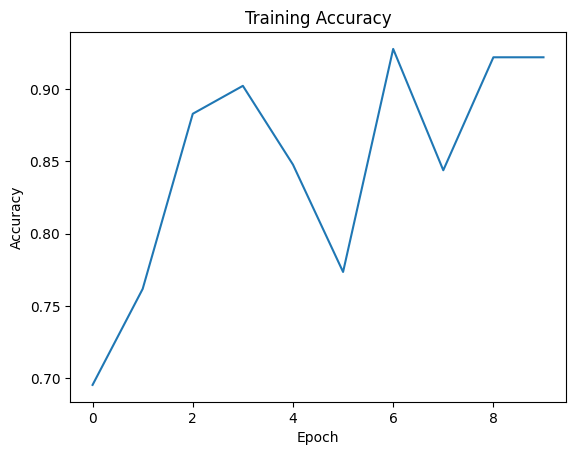

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])


plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.applications.mobilenet import preprocess_input

class_labels = {1: 'NON_CANCER', 0: 'CANCER'}

def predict_image_class(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    pred_class_index = np.argmax(predictions, axis=1)[0]
    pred_class_label = class_labels[pred_class_index]
    return pred_class_label, predictions[0]

image_paths = [
    "/content/drive/MyDrive/ML_project/Train/CANCER/496.jpeg",
    "/content/drive/MyDrive/ML_project/Train/CANCER/494.jpeg",
    "/content/drive/MyDrive/ML_project/Train/NON _CANCER/012.jpeg",
    "/content/drive/MyDrive/ML_project/Train/NON _CANCER/029.jpeg",
    "/content/drive/MyDrive/ML_project/IMG_20240422_235021.jpg",
    "/content/drive/MyDrive/ML_project/IMG_20240422_235311.jpg"
]

model = load_model("/content/best_model.h5")

for path in image_paths:
    pred_class_label, pred_probabilities = predict_image_class(path, model)
    print("Image:", path)
    print("Predicted class:", pred_class_label)
    print("Predicted probabilities:", 1-pred_probabilities)
    print()


1/1 [==============================] - 1s 572ms/step
Image: /content/drive/MyDrive/ML_project/Train/CANCER/496.jpeg
Predicted class: CANCER
Predicted probabilities: [1.]

1/1 [==============================] - 0s 58ms/step
Image: /content/drive/MyDrive/ML_project/Train/CANCER/494.jpeg
Predicted class: CANCER
Predicted probabilities: [1.]

1/1 [==============================] - 0s 61ms/step
Image: /content/drive/MyDrive/ML_project/Train/NON _CANCER/012.jpeg
Predicted class: CANCER
Predicted probabilities: [0.]

1/1 [==============================] - 0s 62ms/step
Image: /content/drive/MyDrive/ML_project/Train/NON _CANCER/029.jpeg
Predicted class: CANCER
Predicted probabilities: [0.]

1/1 [==============================] - 0s 57ms/step
Image: /content/drive/MyDrive/ML_project/IMG_20240422_235021.jpg
Predicted class: CANCER
Predicted probabilities: [2.104044e-05]

1/1 [==============================] - 0s 55ms/step
Image: /content/drive/MyDrive/ML_project/IMG_20240422_235311.jpg
Predicted 